# ----------------    project: Emergency - 911 Calls    ----------------

    # For this project, we'll analyze 911 call data from Kaggle (https://www.kaggle.com/mchirico/montcoalert)
    # Since the dataset is large, we'll use a smaller version from any GitHub repo with similar data. 

#### --------  About dataset:  --------
    # The dataset includes the following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

### ----  Getting basic info from the dataset  ----

In [1]:
# import libraries
import numpy as np
import pandas as pd

# We'll use following visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# shows figures in ipynb
%matplotlib inline

In [3]:
# Read in the csv file and as a dataframe
df = pd.read_csv("./data_call_911_small.csv")

# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
# inspect first 5 row
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# top 5 most appeared zip codes
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
# top 5 townships (twp) for 911 calls?
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [16]:
# how many unique title codes are in the 'title' column?
# df['title'].unique # gets the uniques
df['title'].nunique()

110

___

### ----  Creating new features  ----

In [4]:
# Extract the department (EMS, Fire, or Traffic) from the title column using 
    # .apply() with a lambda function and store it in a new column called Reason.
    # Example: If title is "EMS: BACK PAINS/INJURY", then Reason will be "EMS".
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [5]:
# What is the common Reasons for a 911 call (use new column)?
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

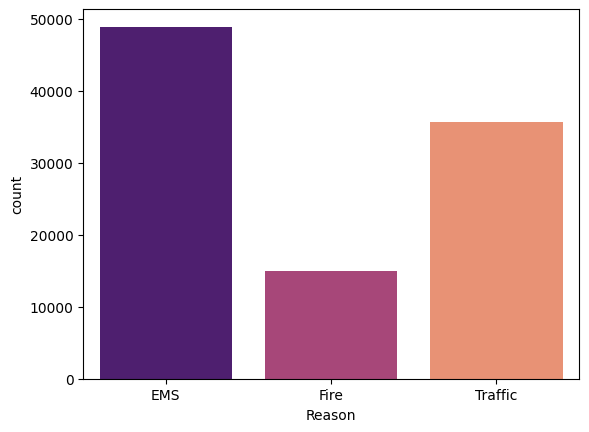

In [7]:
#  use seaborn to create a countplot of 911 calls by Reason.
sns.countplot(x='Reason', data=df, palette='magma')

___

### ----  time information  ----


In [17]:
# lets focus on time information. 
df["timeStamp"].dtypes  # Check the column's data type

dtype('O')

In [18]:
# data type of the objects in the timeStamp column
type(df["timeStamp"].iloc[0])   # Check the type of individual elements

str

In [4]:
# Convert to datetime (since the column contains string timestamps)
    # Use pd.to_datetime to convert the column from strings to DateTime objects.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [5]:
# re-check
print(df['timeStamp'].dtype)
print(type(df["timeStamp"].iloc[0]))

datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
# since the "timeStamp" column is now in DateTime format, individual components like hour, month, and day of the week 
    # can be extracted using their respective attributes (hour, month, dayofweek).

            # time = df['timeStamp'].iloc[0]
            # time.hour

    # There are various attributes we can call. 

# Now we'll use ".apply()" to create 3 new columns called 'Hour', 'Month', and 'Day of Week' based off of the timeStamp column
    # Each row's timeStamp value is passed to the lambda function, 
    # which extracts the relevant attribute and assigns it to the corresponding new column.
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [11]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3


In [6]:
# use .map() with following dictionary to map the actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [13]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thu


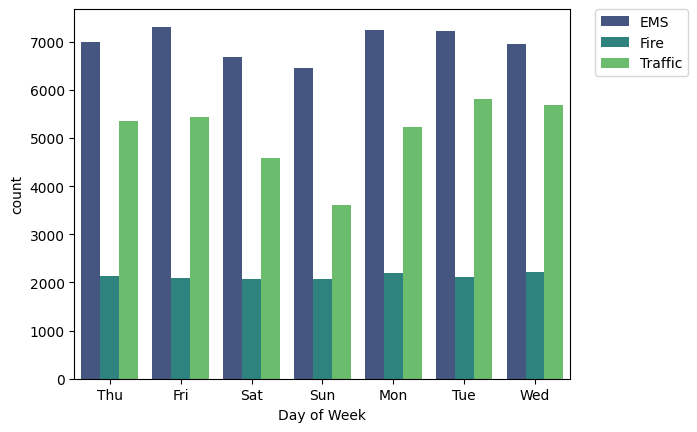

In [10]:
# visualization for "Day of Week"
# use seaborn to create a "countplot" of the "Day of Week" column with the "Reason" column based "hue"
sns.countplot(data=df, x='Day of Week', hue='Reason', palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

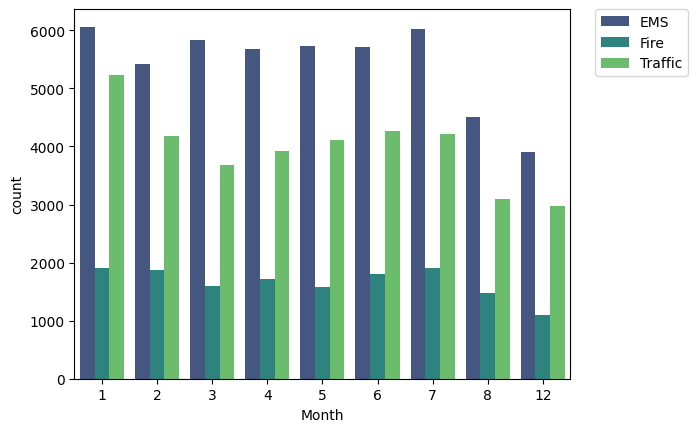

In [11]:
# visualization for "Month"
sns.countplot(data=df, x='Month', hue='Reason', palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### --------    fill missing info    --------
    # notice something strange about above Plot: some missing months
        # Some months are missing, so a different approach is needed to visualize the data. 
        # A line plot can help fill in the gaps, but first, the data must be prepared.

    # Create a groupby object called byMonth, grouping by the "Month" column and using count() to aggregate. 
        # Then, display the first few rows with head().


In [7]:
byMonth = df.groupby('Month')
counted = byMonth.count()     # looks at "Month" and give us the "count"
counted.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of Week
Month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423


In [17]:
byMonth.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu
7969,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:12:01,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,0,1,Fri
21174,40.185223,-75.450603,2ND AVE & E MAIN ST; COLLEGEVILLE; 2016-02-01 ...,19426.0,Traffic: HAZARDOUS ROAD CONDITIONS -,2016-02-01 00:42:00,COLLEGEVILLE,2ND AVE & E MAIN ST,1,0,2,Mon
32641,40.155369,-75.124353,RUSSELL RD & ANDREA DR; UPPER MORELAND; Stati...,19090.0,EMS: HEMORRHAGING,2016-03-01 00:07:01,UPPER MORELAND,RUSSELL RD & ANDREA DR,1,0,3,Tue
43742,40.162804,-75.097848,YORK RD & TURNPIKE OVERPASS; UPPER MORELAND; 2...,19040.0,Traffic: ROAD OBSTRUCTION -,2016-04-01 00:07:01,UPPER MORELAND,YORK RD & TURNPIKE OVERPASS,1,0,4,Fri
55068,40.210101,-75.275821,MAIN ST & E MONTGOMERY AVE; NORTH WALES; Stat...,19454.0,EMS: ABDOMINAL PAINS,2016-05-01 00:02:01,NORTH WALES,MAIN ST & E MONTGOMERY AVE,1,0,5,Sun
66491,40.082981,-75.206303,STENTON AVE & NEWTON ST; SPRINGFIELD; Station...,19038.0,EMS: HEAD INJURY,2016-06-01 00:12:00,SPRINGFIELD,STENTON AVE & NEWTON ST,1,0,6,Wed
78277,40.245448,-75.433483,CHANDLER LN & WENTZ LN; SKIPPACK; 2016-07-01 @...,19473.0,Fire: CARDIAC ARREST,2016-07-01 00:06:01,SKIPPACK,CHANDLER LN & WENTZ LN,1,0,7,Fri
90414,40.111326,-75.127148,CANTERBURY RD & HEMLOCK CIR; ABINGTON; Statio...,19001.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-08-01 00:12:00,ABINGTON,CANTERBURY RD & HEMLOCK CIR,1,0,8,Mon


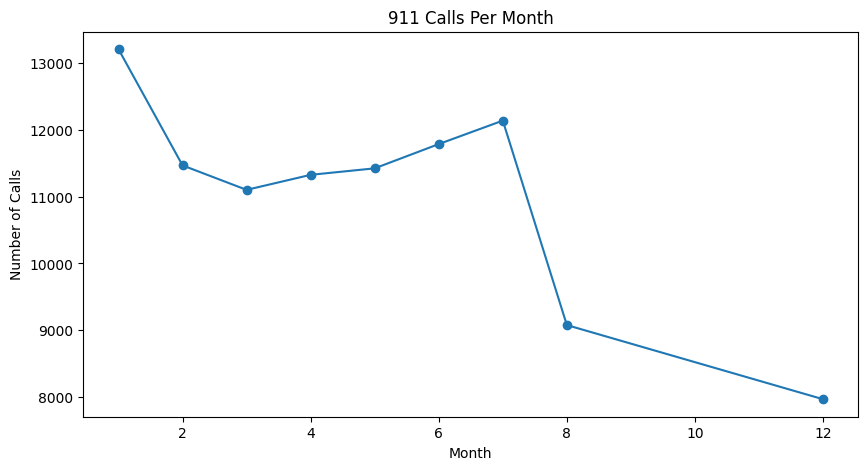

In [11]:
# byMonth['title'] is a Pandas Series containing the count of calls per month.
# .plot() is the "Pandas built-in method" that simplifies plotting without explicitly calling Matplotlib functions.
# figsize, marker, and linestyle are passed as parameters to customize the plot.
import matplotlib.pyplot as plt

# plots the number of calls per month using the title column as the count
# Could be any column
counted['title'].plot(figsize=(10, 5), marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('911 Calls Per Month')
plt.show()

### SEABORN

In [13]:
# SEABORN: use seaborn's lmplot() to create a "linear fit" on the "number of calls per month". 
# reset the index: Keep in mind you may need to reset the index to a column.
import seaborn as sns  

# Reset index so "Month" becomes a column  
counted = counted.reset_index()  

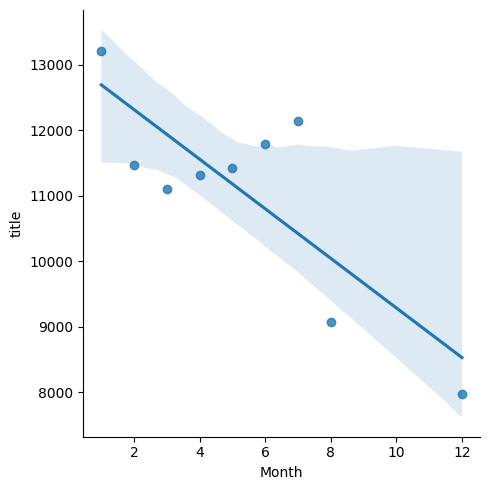

In [14]:
# Plot using seaborn's lmplot
sns.lmplot(x='Month', y='title', data=counted)  